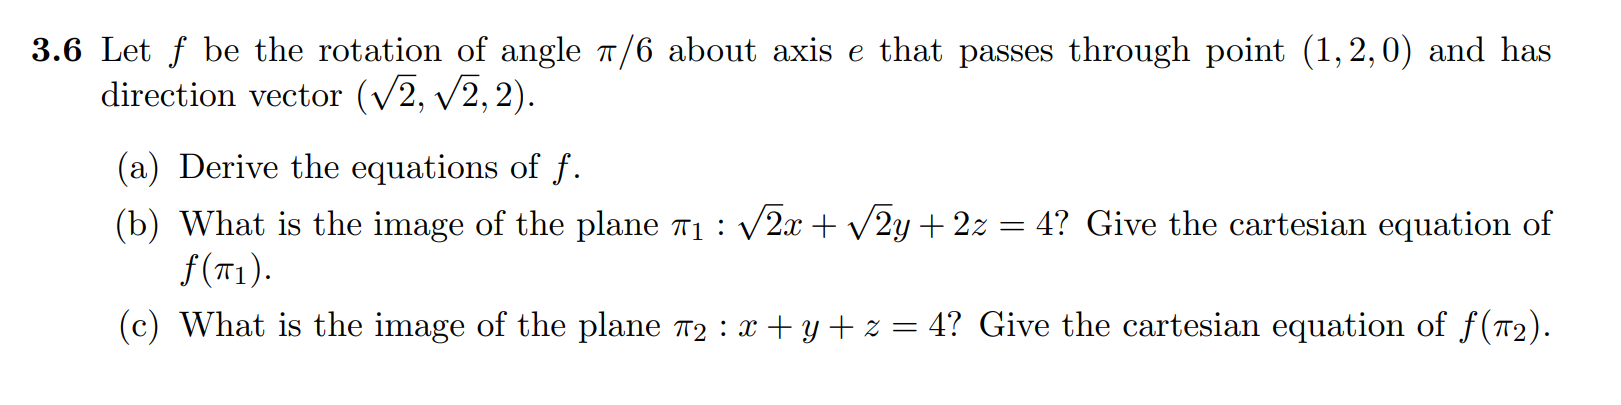

In [1]:
from IPython.display import Image
Image(filename="statement.png")

In [2]:
# Basic information to display
origin = vector((0,0,0))
# Canonical axes
axis1=vector((1,0,0))
axis2=vector((0,1,0))
axis3=vector((0,0,1))

# Graphic representation, in order to plot them
canonical_axes = arrow(origin, origin + axis1, color='green') + \
    arrow(origin, origin + axis2, color='red') + \
    arrow(origin, origin + axis3, color='blue')

Definition of variables:

In [3]:
point = vector((1,2,0))
direction_v = vector((sqrt(2),sqrt(2),2))
rotation = pi/6

dir_v_norm = direction_v.normalized()
u = dir_v_norm

arrow(point, point + dir_v_norm, color='yellow')+canonical_axes

Graphics3d Object

a) Derive the equations

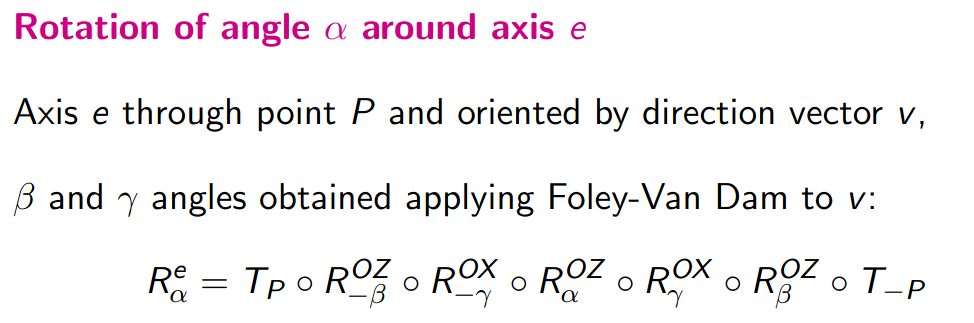

In [4]:
from IPython.display import Image
Image(filename="RotationAngleAxis.png")

In [5]:
T_to_origin = Matrix([
        [1, 0, 0, -point[0]],
        [0, 1, 0, -point[1]],
        [0, 0, 1, -point[2]],
        [0, 0, 0, 1]
    ])
T_to_pos = Matrix([
        [1, 0, 0, point[0]],
        [0, 1, 0, point[1]],
        [0, 0, 1, point[2]],
        [0, 0, 0, 1]
    ])

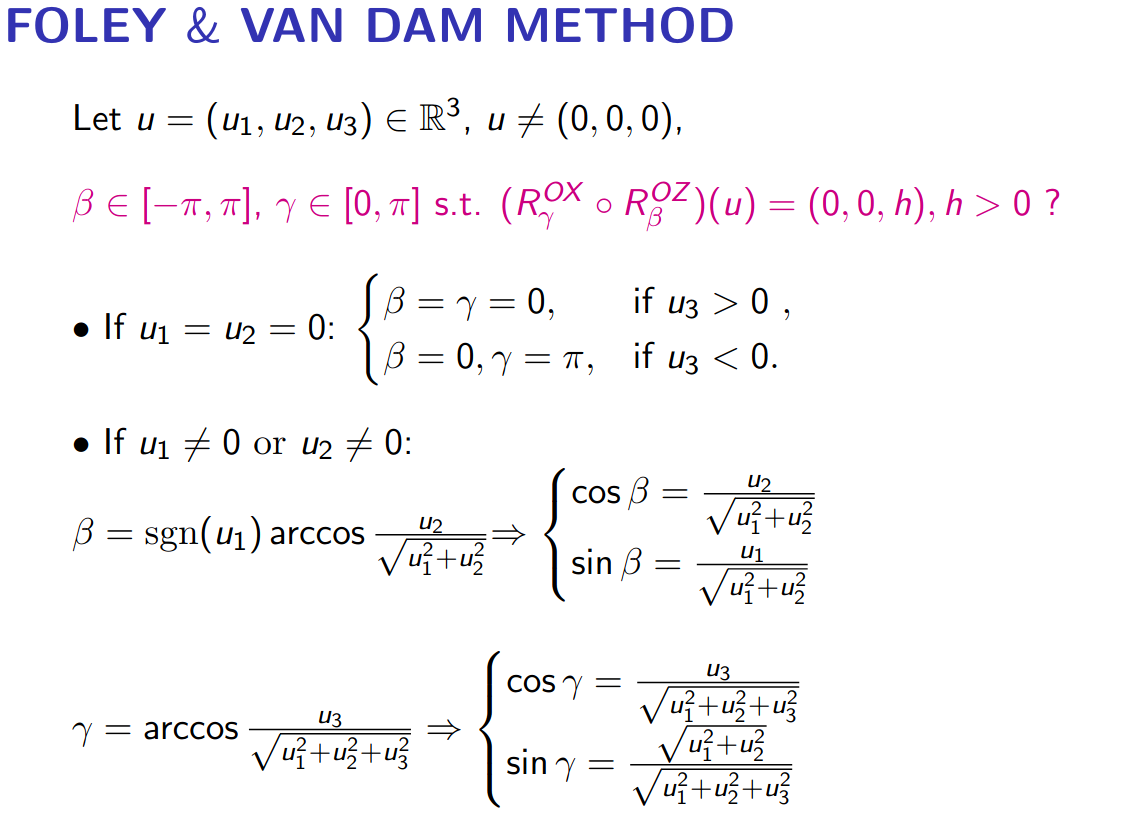

In [6]:
from IPython.display import Image
Image(filename="FoleyVanDam.png")

In [7]:
# for x-axis
cos_beta = u[1]/sqrt(u[0]*u[0] + u[1]*u[1])
sin_beta = u[0]/sqrt(u[0]*u[0] + u[1]*u[1])
# for y-axis
cos_gamma = u[2]/sqrt(u[0]*u[0] + u[1]*u[1] + u[2]*u[2])
sin_gamma = sqrt((u[0]*u[0] + u[1]*u[1])/(u[0]*u[0] + u[1]*u[1] + u[2]*u[2]))

R_z = Matrix([
        [cos_beta, -sin_beta, 0, 0],
        [sin_beta, cos_beta , 0, 0],
        [0       , 0        , 1, 0],
        [0       , 0        , 0, 1]
    ])

R_z_neg = R_z.transpose()

R_x = Matrix([
        [1, 0        , 0         , 0],
        [0, cos_gamma , -sin_gamma , 0],
        [0, sin_gamma , cos_gamma  , 0],
        [0, 0        , 0         , 1]
    ])

R_x_neg = R_x.transpose()

#rotation at z-axis
R_z_alpha = Matrix([
        [cos(rotation), -sin(rotation), 0, 0],
        [sin(rotation), cos(rotation) , 0, 0],
        [0            , 0             , 1, 0],
        [0            , 0             , 0, 1]
    ])

Lets visualize all the steps to make sure we haven't done anything wrong!

In [8]:
R_Mat = T_to_pos * R_z_neg * R_x_neg * R_z_alpha * R_x * R_z * T_to_origin

Lets test it and visualize the next transformation with many points and different angles:

In [9]:
import numpy as np

# generation of one point and the result of applying the rotation
test_p = vector((1,1,0))
hom_p = vector((test_p[0],test_p[1], test_p[2], 1))
newPoint = R_Mat * hom_p
newPoint = vector((newPoint[0], newPoint[1], newPoint[2]))
p_m = point3d(newPoint, color='green', size=10)

# Visualization
p = Graphics()
p += arrow(point, point + dir_v_norm, color='yellow')+canonical_axes

num_points = 40
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
test_p = vector((1,1,0))
hom_p = vector((test_p[0],test_p[1], test_p[2], 1))

for i, angle in enumerate(angles):
    
    R_z_alpha = Matrix([
            [cos(angle), -sin(angle), 0, 0],
            [sin(angle), cos(angle) , 0, 0],
            [0            , 0       , 1, 0],
            [0            , 0       , 0, 1]
        ])
    
    R_Mat1 = T_to_pos * R_z_neg * R_x_neg * R_z_alpha * R_x * R_z * T_to_origin
    newPoint = R_Mat1 * hom_p
    newPoint = vector((newPoint[0], newPoint[1], newPoint[2]))
    if (angle == 0):
        p += point3d(newPoint, color='blue', size=10)
    else:
        p += point3d(newPoint, color='yellow', size=10)

p += p_m
p.show() 


Graphics3d Object

b) What is the image of the plane p1 : sqrt(2)x + sqrt(2)y + 2z = 4 after applying the rotation?

In [10]:
from sage.plot.plot3d.implicit_plot3d import implicit_plot3d
from sage.symbolic.constants import pi

# Declaration of variables
x, y, z = var('x y z')

plane1_equation = sqrt(2)*x + sqrt(2)*y + 2*z - 4
plane1 = implicit_plot3d(plane1_equation == 0, (x, -3, 3), (y, -3, 3), (z, -3, 3), color='blue', opacity=0.7)

y_val = 1
z_val = 1
solution = solve(plane1_equation.subs({y: y_val, z: z_val}), x)
x_val = solution[0].rhs()


# Show the plot
p = Graphics()
p += plane1
p += arrow(point, point + dir_v_norm, color='yellow')+canonical_axes

num_points = 40
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
test_p = vector((x_val, y_val, z_val))
hom_p = vector((test_p[0],test_p[1], test_p[2], 1))

for i, angle in enumerate(angles):
    
    R_z_alpha = Matrix([
            [cos(angle), -sin(angle), 0, 0],
            [sin(angle), cos(angle) , 0, 0],
            [0            , 0       , 1, 0],
            [0            , 0       , 0, 1]
        ])
    
    R_Mat1 = T_to_pos * R_z_neg * R_x_neg * R_z_alpha * R_x * R_z * T_to_origin
    newPoint = R_Mat1 * hom_p
    newPoint = vector((newPoint[0], newPoint[1], newPoint[2]))
    if (angle == 0):
        p += point3d(newPoint, color='blue', size=10)
    else:
        p += point3d(newPoint, color='yellow', size=10)

p.show()

Graphics3d Object

The normal of this plane has the same direciton as the rotation we are trying to apply. This means that any rotation will not change our plane.
And the plane equation will remain the same!  sqrt(2)*x + sqrt(2)*y + 2*z = 4

c) What is the image of the plane p2 : x + y + z = 4 after applying the rotation?

Lets first visualize the plane

In [11]:
# Declaration of variables
x, y, z = var('x y z')

plane2_equation = x + y + z - 4
plane2 = implicit_plot3d(plane2_equation == 0, (x, -3, 3), (y, -3, 3), (z, -3, 3), color='blue', opacity=0.7)
plane_normal = vector((1,1,1)).normalized()

# Show the plot
p = Graphics()
p += plane2
p += arrow(point, point + dir_v_norm, color='yellow')+canonical_axes
p += arrow(point, point + plane_normal, color='red')
p.show()

Graphics3d Object

We can see there normal of the plane is different from the rotation direction

Lets see what would happen to a point if we apply the rotation:

In [12]:
y_val = 1
z_val = 1
solution = solve(plane2_equation.subs({y: y_val, z: z_val}), x)
x_val = solution[0].rhs()

# Show the plot
p = Graphics()
p += plane2
p += arrow(point, point + dir_v_norm, color='yellow')+canonical_axes

num_points = 40
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
test_p = vector((x_val, y_val, z_val))
hom_p = vector((test_p[0],test_p[1], test_p[2], 1))

for i, angle in enumerate(angles):
    
    R_z_alpha = Matrix([
            [cos(angle), -sin(angle), 0, 0],
            [sin(angle), cos(angle) , 0, 0],
            [0            , 0       , 1, 0],
            [0            , 0       , 0, 1]
        ])
    
    R_Mat1 = T_to_pos * R_z_neg * R_x_neg * R_z_alpha * R_x * R_z * T_to_origin
    newPoint = R_Mat1 * hom_p
    newPoint = vector((newPoint[0], newPoint[1], newPoint[2]))
    if (angle == 0):
        p += point3d(newPoint, color='blue', size=10)
    else:
        p += point3d(newPoint, color='yellow', size=10)

p.show()

Graphics3d Object

Unfortunately the plane we have been given, has a normal very similar to the original and therefore to see the rotation is going to be complicated to perceive, but lets visualize it anyway:

In [13]:
# I will compute the rotation for three points
#1
y_val1, y_val2, y_val3 = 1, 1, 2
z_val1, z_val2, z_val3 = 1, 2, 1

# Solve for x-values
sol1 = solve(plane2_equation.subs({y: y_val1, z: z_val1}), x)
sol2 = solve(plane2_equation.subs({y: y_val2, z: z_val2}), x)
sol3 = solve(plane2_equation.subs({y: y_val3, z: z_val3}), x)

# Extract x-values
x_val1 = sol1[0].rhs()
x_val2 = sol2[0].rhs()
x_val3 = sol3[0].rhs()

# Define points
point1 = (x_val1, y_val1, z_val1)
point2 = (x_val2, y_val2, z_val2)
point3 = (x_val3, y_val3, z_val3)

# Create homogeneous vectors for rotation
aux_p1 = vector((x_val1, y_val1, z_val1, 1))
aux_p2 = vector((x_val2, y_val2, z_val2, 1))
aux_p3 = vector((x_val3, y_val3, z_val3, 1))

# Apply rotation matrix to points
newPoint1 = R_Mat * aux_p1
newPoint2 = R_Mat * aux_p2
newPoint3 = R_Mat * aux_p3

# Convert back to 3D points (discard homogeneous coordinate)
newPoint1 = vector((newPoint1[0], newPoint1[1], newPoint1[2]))
newPoint2 = vector((newPoint2[0], newPoint2[1], newPoint2[2]))
newPoint3 = vector((newPoint3[0], newPoint3[1], newPoint3[2]))

# Visualize original and rotated triangles
p = Graphics()

p += canonical_axes

# Add original and transformed triangles
p += polygon([point1, point2, point3], color='blue', edgecolor='black', thickness=1, alpha=0.5)
p += polygon([newPoint1, newPoint2, newPoint3], color='yellow', edgecolor='black', thickness=1, alpha=0.5)

# Show the plot
p.show()

Graphics3d Object

Now with three points we can get the equation of the plane, lets first get the normal:

In [14]:
p = Graphics()

p += canonical_axes

e3 = (newPoint1 - newPoint2).normalized() # Tangent is the green one that is tangent to the point of the helix (can see in image)
e1 = (newPoint2 - newPoint3).normalized()
e2 = -e1.cross_product(e3).normalized() # Cross product

p += arrow(newPoint1, newPoint1 + e3, color='yellow')
p += arrow(newPoint1, newPoint1 + e1, color='magenta')
p += arrow(newPoint1, newPoint1 + e2, color='black')
p += polygon([newPoint1, newPoint2, newPoint3], color='yellow', edgecolor='black', thickness=1, alpha=0.5)
# Show the plot
p.show()

Graphics3d Object

In [15]:
# And now that we have the normal of the plane we can get:
# ax + by + cz + d = 0
# d = -(ax + by + cz)

d = -(e2[0]*newPoint1[0] + e2[1]*newPoint1[1] + e2[2]*newPoint1[2])

x, y, z = var('x y z')

plane3_equation = e2[0]*x + e2[1]*y + e2[2]*z + d
plane3 = implicit_plot3d(plane3_equation == 0, (x, -3, 3), (y, -3, 3), (z, -3, 3), color='blue', opacity=0.7)
plane_normal = vector((1,1,1)).normalized()

# Show the plot
p = Graphics()
p += plane3
p += polygon([point1, point2, point3], color='cyan', edgecolor='black', thickness=1, alpha=0.5)
p += polygon([newPoint1, newPoint2, newPoint3], color='yellow', edgecolor='black', thickness=1, alpha=0.5)
p += arrow(newPoint1, newPoint1 + e3, color='yellow')
p += arrow(newPoint1, newPoint1 + e1, color='magenta')
p += arrow(newPoint1, newPoint1 + e2, color='black')
p += canonical_axes
p.show()


Graphics3d Object

And finally our cartesian equation will be plane3_equation